# 7. Персептрон

In [1]:
from setup_libs import *

In [2]:
import torch

## 7.1 Нейрон (персептрон)

### Устройство нейрона

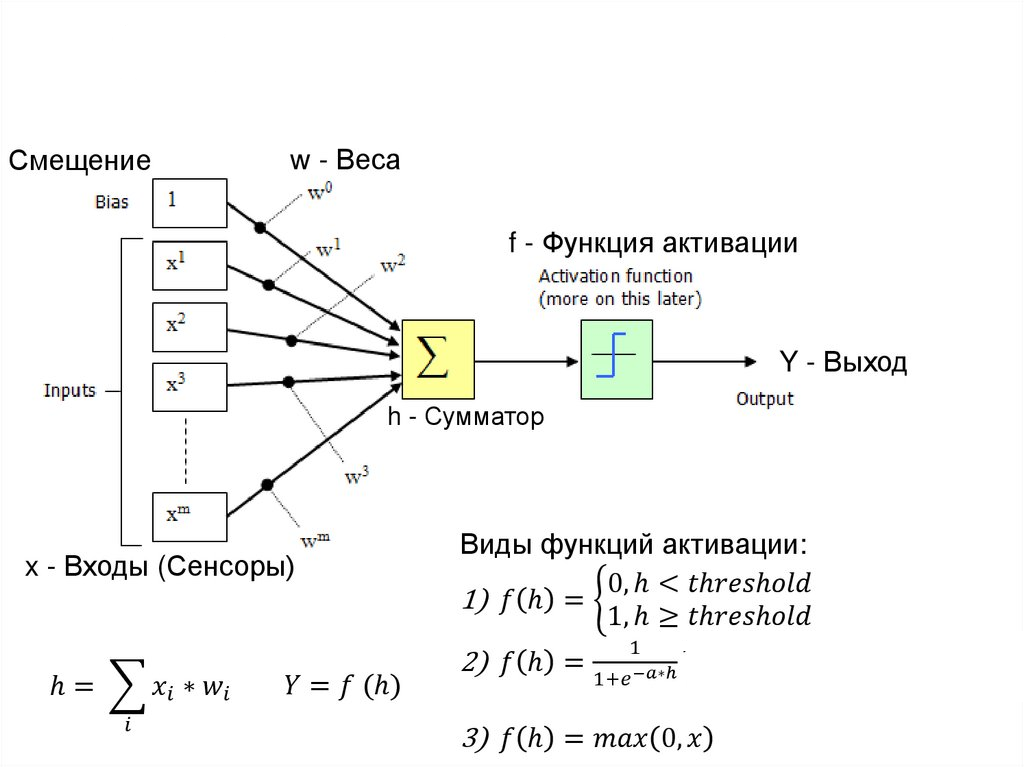

In [3]:
Image('images/perc1.png')

In [33]:
from torch.nn import Linear, Sigmoid, Sequential, Threshold

x = torch.FloatTensor([[2, 4]])

l = Linear(in_features=2, 
           out_features=1) # по сути матричное перемножение на веса 2 -> 1

# если ручками не обозначить, то будут произвольные значения браться
l.weight.data = torch.FloatTensor([[1, 1]])
l.bias.data   = torch.FloatTensor([[-1]])

s = Sigmoid()

def net(x):
    return s(l(x))

net(x)

tensor([[0.9933]], grad_fn=<SigmoidBackward>)

Рисуем линию
$x_1 + x_2 - 1 = 0$

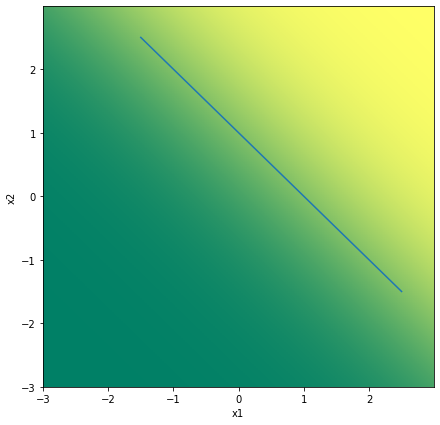

In [30]:
xx, yy = np.meshgrid(np.arange(-3, 3, .01), np.arange(-3, 3,.01))
input_field = np.c_[xx.ravel(), yy.ravel()]

predicted = net(torch.FloatTensor(input_field)).data.reshape(xx.shape)

# Отрисовка плоскости
plt.figure(figsize=(7, 7))
ax = plt.gca()
ax.pcolormesh(xx, yy, predicted, cmap='summer')
plt.xlabel('x1')
plt.ylabel('x2')

x_1 = np.linspace(-1.5, 2.5, 100)
x_2 = 1 - x_1 

ax.plot(x_1, x_2)

### Логические функции через нейрон

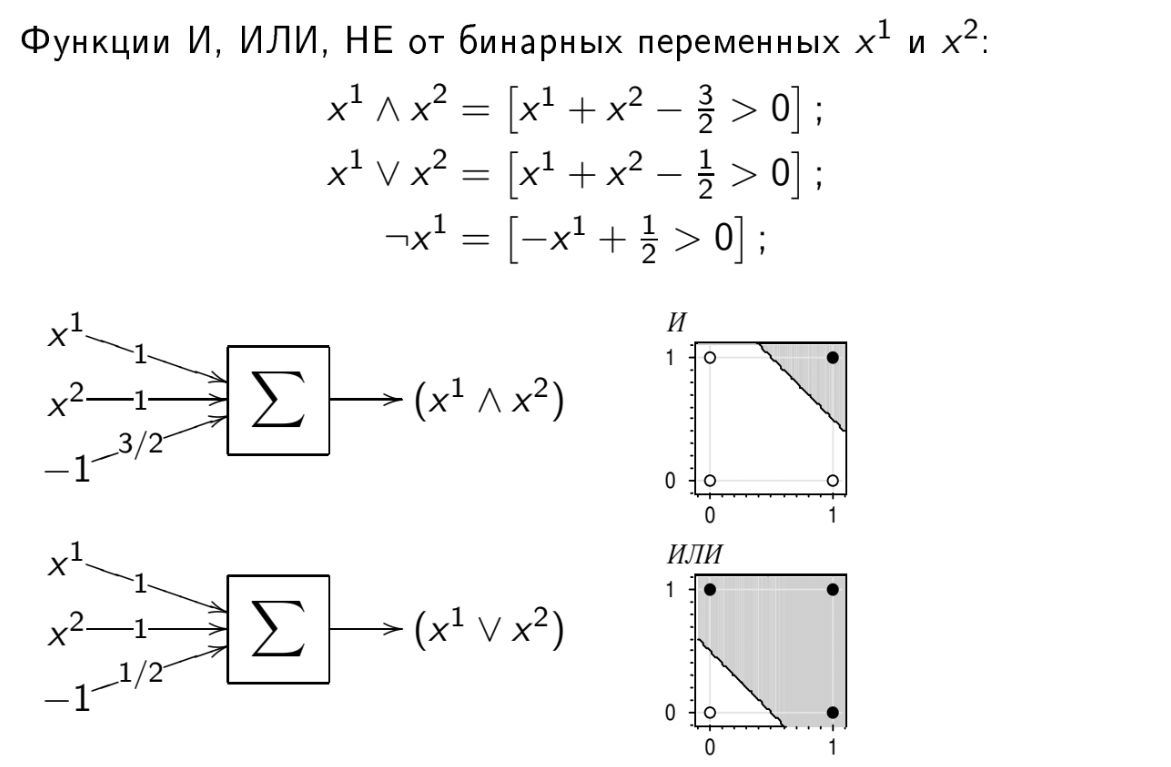

In [6]:
Image('images/logic1.png', width=800)

In [7]:
x = torch.FloatTensor([[0, 0],
                       [0, 1],
                       [1, 0],
                       [1, 1]])

In [8]:
def AND(x):
    lin = Linear(2, 1)

    # ручная инициализация
    lin.weight.data = torch.FloatTensor([[1, 1]])
    lin.bias.data   = torch.FloatTensor([[-1.5]])

    return (lin(x) > 0).float() # функция активации

AND(x)

tensor([[0.],
        [0.],
        [0.],
        [1.]])

In [9]:
def OR(x):
    lin = Linear(2, 1)

    # ручная инициализация
    lin.weight.data = torch.FloatTensor([[1, 1]]) 
    lin.bias.data   = torch.FloatTensor([[-0.5]])

    return (lin(x) > 0).float() #функция активации

OR(x)

tensor([[0.],
        [1.],
        [1.],
        [1.]])

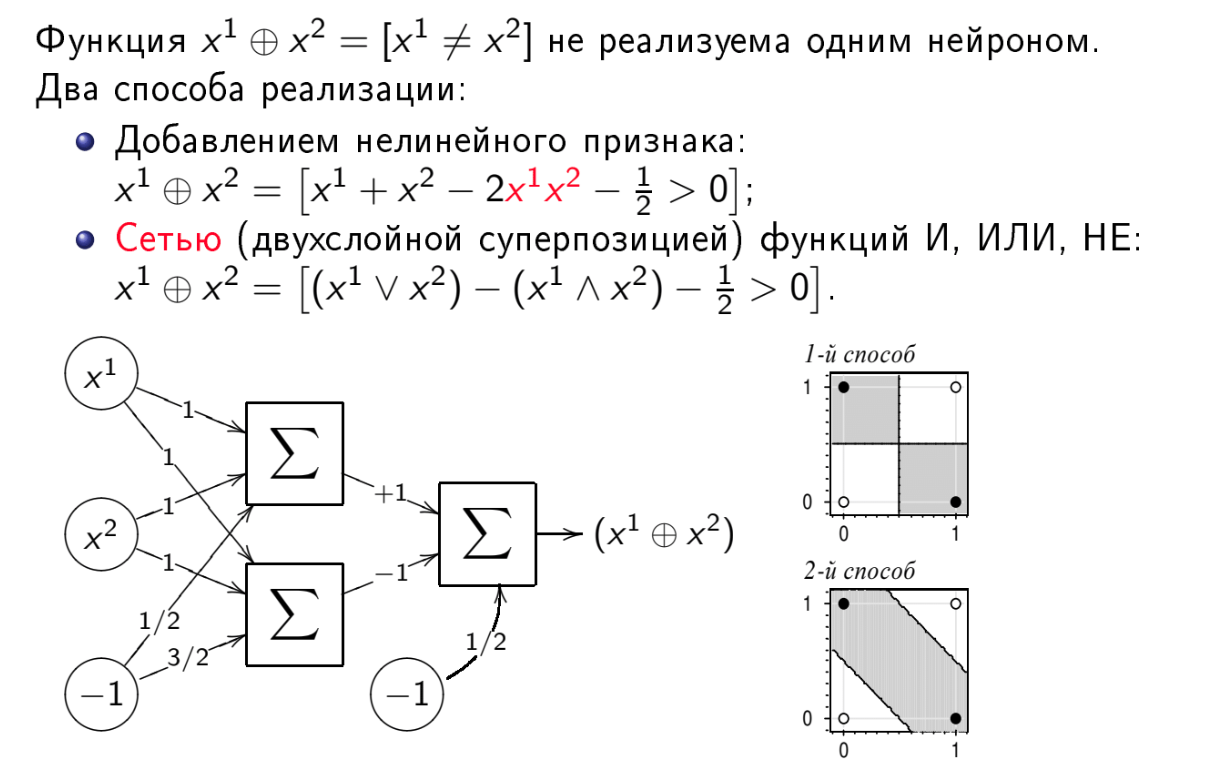

In [13]:
Image('images/xor.png', width=800)

In [10]:
second_input = torch.cat([OR(x), AND(x)], dim=1)
second_input

tensor([[0., 0.],
        [1., 0.],
        [1., 0.],
        [1., 1.]])

In [11]:
def XOR(x):
    lin = Linear(2, 1)

    # ручная инициализация
    lin.weight.data = torch.FloatTensor([[1, -1]])
    lin.bias.data   = torch.FloatTensor([[-0.5]])

    return (lin(x) > 0).float()

XOR(second_input) 

tensor([[0.],
        [1.],
        [1.],
        [0.]])

Зачем обозначать руками нейроны, когда можно целые слои  

In [12]:
def OR_AND(x):
    lin1 = Linear(2, 2) #СЛОЙ 2->2
    
    lin1.weight.data = torch.FloatTensor([[1, 1], 
                                          [1, 1]])
    
    lin1.bias.data   = torch.FloatTensor([[-0.5, -1.5]])
    
    return (lin1(x) > 0).float()

XOR(OR_AND(x))

tensor([[0.],
        [1.],
        [1.],
        [0.]])

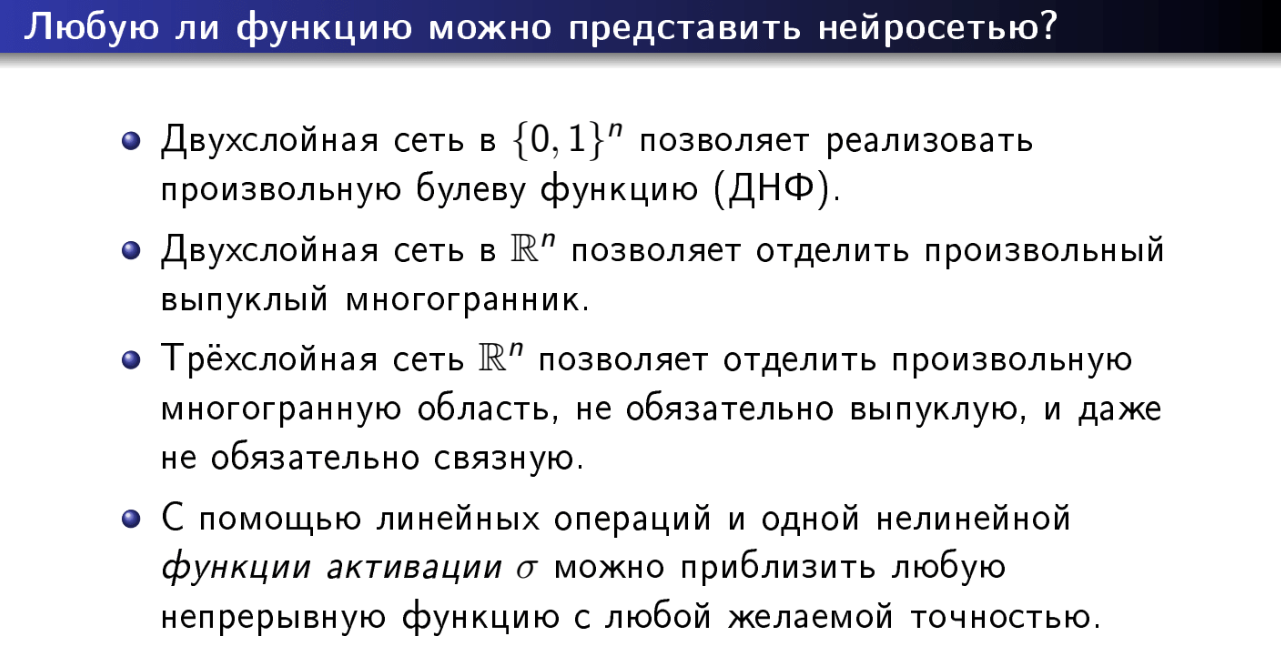

In [18]:
Image('images/percres.png', width=800)

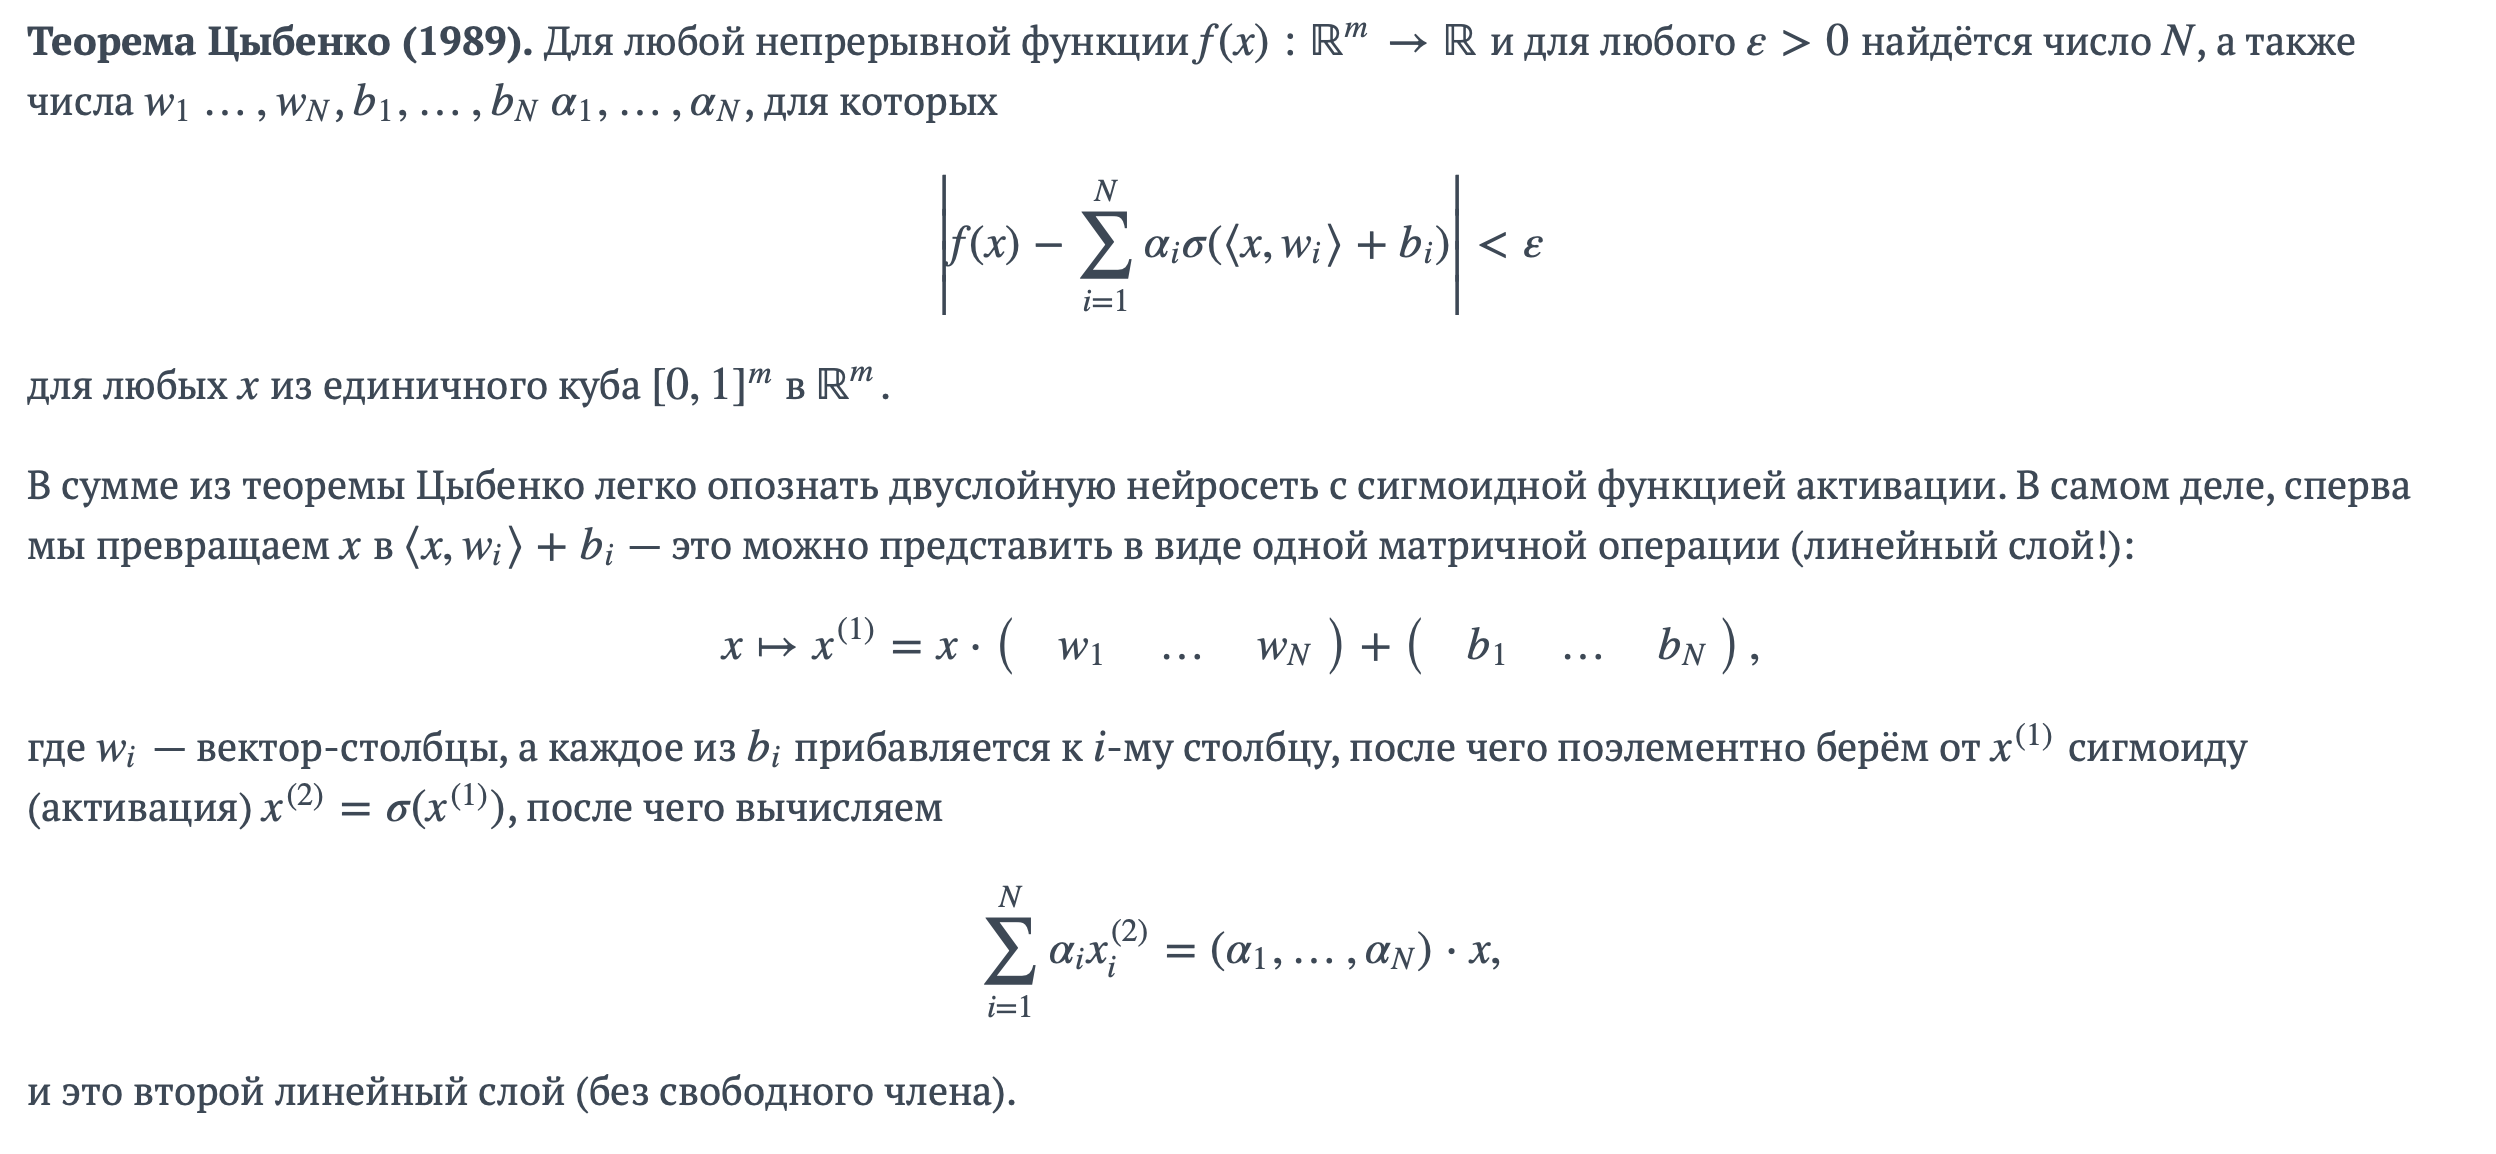

In [14]:
Image('images/cybenko.png', width=800)

## 7.2 Пример обучения одномерной нейронной сети
[Взято из туториала](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)

Хотим с помощью нейронки обучить функцию $y = sin(x)$ 

в пространстве полиномов $y = a + bx + cx^2 + dx^3$

### 7.2.1 Градиентный спуск на торче и тензорах

99 50.33818817138672
199 36.311153411865234
299 27.02644157409668
399 20.8785343170166
499 16.807241439819336
599 14.11086368560791
699 12.324892044067383
799 11.141752243041992
899 10.35793685913086
999 9.838562965393066
1099 9.494393348693848
1199 9.266274452209473
1299 9.115047454833984
1399 9.01479434967041
1499 8.9483003616333
1599 8.904195785522461
1699 8.874944686889648
1799 8.855533599853516
1899 8.842649459838867
1999 8.834099769592285
Result: y = 0.0011752904392778873 + 0.8528892993927002 x + -0.00020275774295441806 x^2 + -0.09278253465890884 x^3


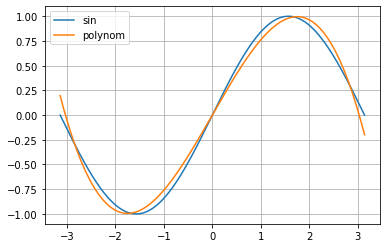

In [34]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss, MSE
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')
def f(x):
    return a + b * x + c * x**2 + d * x**3

plt.plot(x,np.sin(x), label='sin')
plt.plot(x, f(x), label='polynom')
plt.legend()
plt.grid()

### 7.2.2 Используем Autograd

99 820.10986328125
199 553.0638427734375
299 374.20550537109375
399 254.32589721679688
499 173.91664123535156
599 119.94013977050781
699 83.67779541015625
799 59.29578399658203
899 42.88756561279297
999 31.8354549407959
1099 24.38425064086914
1199 19.355924606323242
1299 15.95928955078125
1399 13.662602424621582
1499 12.10802936553955
1599 11.054671287536621
1699 10.340194702148438
1799 9.855034828186035
1899 9.525224685668945
1999 9.300774574279785
Result: y = -0.016224553808569908 + 0.8414120674133301 x + 0.002799005713313818 x^2 + -0.09115000069141388 x^3


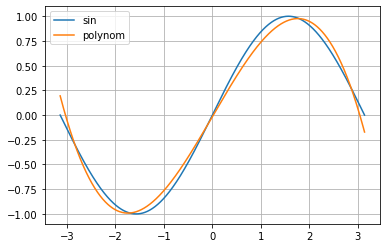

In [38]:
dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    loss = (y_pred - y).pow(2).sum()
    
    if t % 100 == 99:
        print(t, loss.item())

    loss.backward()

    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

def f(x):
    return a.detach().numpy() + b.detach().numpy() * x + c.detach().numpy() * x ** 2 + d.detach().numpy() * x ** 3

xx = x.numpy()

plt.plot(xx, np.sin(x), label='sin')
plt.plot(xx, f(xx), label='polynom')
plt.legend()
plt.grid()

## 7.2.3 Используем нейросеть + встроенный лосс

In [40]:
# Подготовили данные 
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

In [24]:
xx

tensor([[ -3.1416,   9.8696, -31.0063],
        [ -3.1384,   9.8499, -30.9133],
        [ -3.1353,   9.8301, -30.8205],
        ...,
        [  3.1353,   9.8301,  30.8205],
        [  3.1384,   9.8499,  30.9133],
        [  3.1416,   9.8696,  31.0063]])

In [19]:
# Define model
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

for x in model.parameters():
    print(x)

Parameter containing:
tensor([[ 0.0564, -0.2513,  0.4860]], requires_grad=True)
Parameter containing:
tensor([-0.5281], requires_grad=True)


99 1224.8291015625
199 815.5772094726562
299 544.1780395507812
399 364.1625061035156
499 244.73593139648438
599 165.48854064941406
699 112.89016723632812
799 77.9709243774414
899 54.78253173828125
999 39.379798889160156
1099 29.145647048950195
1199 22.343469619750977
1299 17.820972442626953
1399 14.813077926635742
1499 12.811761856079102
1599 11.479690551757812
1699 10.592696189880371
1799 10.001821517944336
1899 9.608004570007324
1999 9.345398902893066
Result: y = -0.009507797658443451 + 0.8361760377883911 x + 0.0016402526525780559 x^2 + -0.09040522575378418 x^3


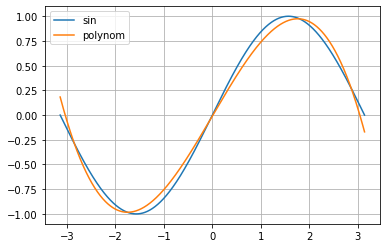

In [41]:
# Define model
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for it in range(2000):
    # Forward pass: все до последней ноды
    y_pred = model(xx) 

    # Compute loss: финальная нода с лоссом
    loss = loss_fn(y_pred, y)
    if it % 100 == 99:
        print(it, loss.item())

    # Обнулили градиенты с прошлой итерации
    model.zero_grad()    
        
    # Backward pass: просчитали градиенты назад
    loss.backward()

    # Update the weights using gradient descent. 
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

            

# просто рисовалка      
linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')
def f(x):
    return linear_layer.bias.item() + linear_layer.weight[:, 0].item() * x + \
           linear_layer.weight[:, 1].item() * x ** 2 + linear_layer.weight[:, 2].item() * x ** 3

x = x.detach()
plt.plot(x, np.sin(x), label='sin')
plt.plot(x, f(x), label='polynom')
plt.legend()
plt.grid()

## 7.2.4 Используем стохастический спуск. Идея обособленного оптимайзера

In [42]:
# Подготовили данные 
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Сделали шаблон сети
model = torch.nn.Sequential(
    torch.nn.Linear(3, 4),
    torch.nn.Sigmoid(),
    torch.nn.Linear(4, 5),
    torch.nn.Sigmoid(),
    torch.nn.Linear(5, 1),
    torch.nn.Flatten(0, 1)
)

# Обозначили лосс
loss_fn = torch.nn.MSELoss(reduction='sum')

# Выбрали алгоритм оптимизации
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
#optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

# Спуск
for t in range(2000):
    # Нашли результат на текущей сети
    y_pred = model(xx)

    # Посчитали ошибку
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    
    #Обнулили градиенты
    optimizer.zero_grad()

    # Посчитали градиенты
    loss.backward()

    # Пересчитываем веса
    optimizer.step()


# просто рисовалка      
linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')
def f(x):
    return linear_layer.bias.item() + linear_layer.weight[:, 0].item() * x + \
           linear_layer.weight[:, 1].item() * x ** 2 + linear_layer.weight[:, 2].item() * x ** 3

plt.plot(x, np.sin(x), label='sin')
plt.plot(x, f(x), label='polynom')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.grid()

99 849.8275146484375
199 723.7672729492188
299 646.197021484375
399 573.1573486328125
499 492.099609375
599 400.187744140625
699 301.7113952636719
799 206.8197784423828
899 127.62261962890625
999 71.74070739746094
1099 38.5228271484375
1199 21.587974548339844
1299 13.94551944732666
1399 10.785187721252441
1499 9.551544189453125
1599 9.086841583251953
1699 8.915352821350098
1799 8.852773666381836
1899 8.830068588256836
1999 8.821843147277832


ValueError: only one element tensors can be converted to Python scalars

![title](https://cs231n.github.io/assets/nn3/opt1.gif)

## 7.2.5 А если взять несколько слоев?

99 862.5868530273438
199 781.0914916992188
299 706.028076171875
399 612.8472900390625
499 468.297119140625
599 235.58253479003906
699 38.0203857421875
799 9.163406372070312
899 8.817840576171875
999 8.817167282104492
1099 8.817160606384277
1199 8.817161560058594
1299 8.817158699035645
1399 8.817161560058594
1499 8.817160606384277
1599 8.817160606384277
1699 8.817159652709961
1799 8.817160606384277
1899 8.817160606384277
1999 8.817160606384277


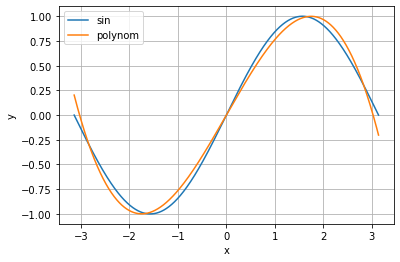

In [30]:
# Подготовили данные 
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# МНО00ГО00СЛО00ЙНАЯ СЕТЬ
model = torch.nn.Sequential(
    torch.nn.Linear(3, 3),
    torch.nn.Linear(3, 3),
    torch.nn.Linear(3, 3),
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# Обозначили лосс
loss_fn = torch.nn.MSELoss(reduction='sum')

# Выбрали алгоритм оптимизации
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Спуск
for t in range(2000):
    
    # Нашли результат на текущей сети
    y_pred = model(xx)

    # Посчитали ошибку
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    
    #Обнулили градиенты
    optimizer.zero_grad()

    # Посчитали градиенты
    loss.backward()

    # Пересчитываем веса
    optimizer.step()


    
# просто рисовалка   
# а вот тут формулы не существует :))
plt.plot(x, np.sin(x), label='sin')
plt.plot(x, model(xx).detach().numpy(), label='polynom')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.grid()

# Так и еще раз на закрепление:
* FORWARD (посчитали вперед по существующей сети)
* LOSS (посчитали ошибку)
* ZERO_GRAD (обнулили градиенты)
* BACKWARD (посчитали производные)
* UPDATE Weights (обновили веса)


## А имеет ли смысл брать несколько слоев?

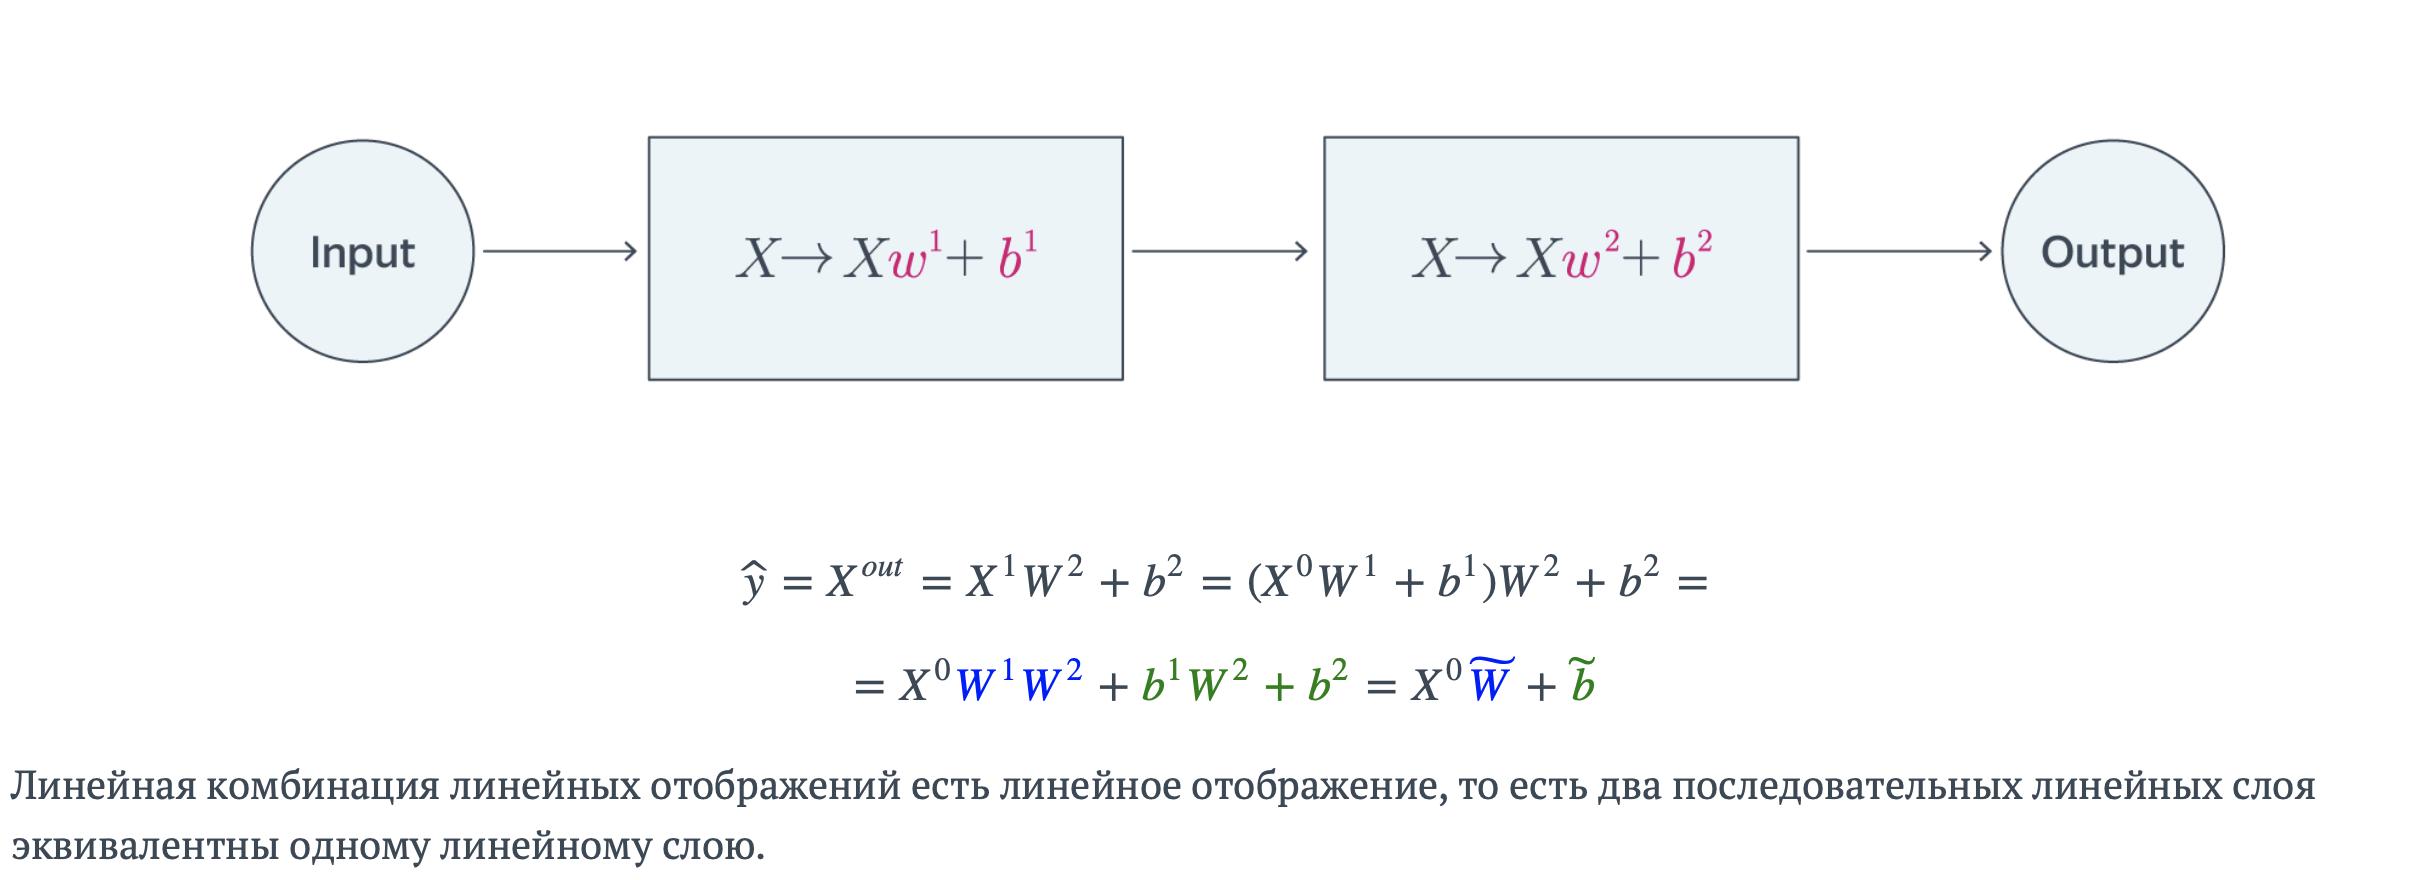

In [27]:
Image('images/2linear.png')